In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [198]:
pd.options.display.max_columns=50
pd.options.display.max_rows=None

pd.options.display.float_format="{:.2f}".format

import warnings
warnings.filterwarnings('ignore')

In [199]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

                  

In [200]:
train.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend
0,isfywypmkqqhyft,2016-07-27,08:05:51 PM,station$147,station$1,ICZVZS,high,whber,4.36,50.85,634.16,NaN,nan,nan,nan,2016,30,Wednesday,False
1,mqsfxyvuqpbwomk,2016-07-27,08:06:11 PM,station$147,station$1,ICZVZS,high,whber,4.36,50.85,634.16,NaN,nan,nan,nan,2016,30,Wednesday,False
2,alspwwtbdvqsgby,2016-07-27,08:08:57 PM,station$147,station$1,ICZVZS,high,whber,4.36,50.85,634.16,NaN,nan,nan,nan,2016,30,Wednesday,False
3,szitxhhqduyrqpg,2016-07-27,08:09:08 PM,station$147,station$1,ICZVZS,high,whber,4.36,50.85,634.16,NaN,nan,nan,nan,2016,30,Wednesday,False
4,krisdqzczivvwcp,2016-07-27,08:11:01 PM,station$147,station$1,ICZVZS,high,whber,4.36,50.85,634.16,NaN,nan,nan,nan,2016,30,Wednesday,False


In [201]:
train.shape,test.shape

((1284, 19), (964, 18))

In [202]:
df=train.copy()

In [203]:
df.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend
0,isfywypmkqqhyft,2016-07-27,08:05:51 PM,station$147,station$1,ICZVZS,high,whber,4.36,50.85,634.16,NaN,nan,nan,nan,2016,30,Wednesday,False
1,mqsfxyvuqpbwomk,2016-07-27,08:06:11 PM,station$147,station$1,ICZVZS,high,whber,4.36,50.85,634.16,NaN,nan,nan,nan,2016,30,Wednesday,False
2,alspwwtbdvqsgby,2016-07-27,08:08:57 PM,station$147,station$1,ICZVZS,high,whber,4.36,50.85,634.16,NaN,nan,nan,nan,2016,30,Wednesday,False
3,szitxhhqduyrqpg,2016-07-27,08:09:08 PM,station$147,station$1,ICZVZS,high,whber,4.36,50.85,634.16,NaN,nan,nan,nan,2016,30,Wednesday,False
4,krisdqzczivvwcp,2016-07-27,08:11:01 PM,station$147,station$1,ICZVZS,high,whber,4.36,50.85,634.16,NaN,nan,nan,nan,2016,30,Wednesday,False


In [204]:
df.shape

(1284, 19)

In [205]:
df['date_time']=df['current_date']+' '+df['current_time']
df['date_time']=pd.to_datetime(df['date_time'])

In [206]:
df['month']=df['date_time'].dt.month
df['date']=df['date_time'].dt.day
df['hour']=df['date_time'].dt.hour


In [207]:
df.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,date_time,month,date,hour
0,isfywypmkqqhyft,2016-07-27,08:05:51 PM,station$147,station$1,ICZVZS,high,whber,4.36,50.85,634.16,NaN,nan,nan,nan,2016,30,Wednesday,False,2016-07-27 20:05:51,7,27,20
1,mqsfxyvuqpbwomk,2016-07-27,08:06:11 PM,station$147,station$1,ICZVZS,high,whber,4.36,50.85,634.16,NaN,nan,nan,nan,2016,30,Wednesday,False,2016-07-27 20:06:11,7,27,20
2,alspwwtbdvqsgby,2016-07-27,08:08:57 PM,station$147,station$1,ICZVZS,high,whber,4.36,50.85,634.16,NaN,nan,nan,nan,2016,30,Wednesday,False,2016-07-27 20:08:57,7,27,20
3,szitxhhqduyrqpg,2016-07-27,08:09:08 PM,station$147,station$1,ICZVZS,high,whber,4.36,50.85,634.16,NaN,nan,nan,nan,2016,30,Wednesday,False,2016-07-27 20:09:08,7,27,20
4,krisdqzczivvwcp,2016-07-27,08:11:01 PM,station$147,station$1,ICZVZS,high,whber,4.36,50.85,634.16,NaN,nan,nan,nan,2016,30,Wednesday,False,2016-07-27 20:11:01,7,27,20


In [208]:
df.drop(['current_date','current_time'],axis=1,inplace=True)

In [209]:
df['country_code_source'].fillna(df['country_code_source'].mode()[0],inplace=True)
df['latitude_source'].fillna(df['latitude_source'].mode()[0],inplace=True)
df['longitude_source'].fillna(df['longitude_source'].mode()[0],inplace=True)
df['mean_halt_times_source'].fillna(df['mean_halt_times_source'].mean(),inplace=True)

In [210]:
df['country_code_destination'].fillna(df['country_code_destination'].mode()[0],inplace=True)
df['latitude_destination'].fillna(df['latitude_destination'].mode()[0],inplace=True)
df['longitude_destination'].fillna(df['longitude_destination'].mode()[0],inplace=True)
df['mean_halt_times_destination'].fillna(df['mean_halt_times_destination'].mean(),inplace=True)

In [211]:
df.isnull().sum()

id_code                        0
source_name                    0
destination_name               0
train_name                     0
target                         0
country_code_source            0
longitude_source               0
latitude_source                0
mean_halt_times_source         0
country_code_destination       0
longitude_destination          0
latitude_destination           0
mean_halt_times_destination    0
current_year                   0
current_week                   0
current_day                    0
is_weekend                     0
date_time                      0
month                          0
date                           0
hour                           0
dtype: int64

In [212]:
df.head()

,id_code,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,date_time,month,date,hour
0,isfywypmkqqhyft,station$147,station$1,ICZVZS,high,whber,4.36,50.85,634.16,whber,4.34,50.84,271.87,2016,30,Wednesday,False,2016-07-27 20:05:51,7,27,20
1,mqsfxyvuqpbwomk,station$147,station$1,ICZVZS,high,whber,4.36,50.85,634.16,whber,4.34,50.84,271.87,2016,30,Wednesday,False,2016-07-27 20:06:11,7,27,20
2,alspwwtbdvqsgby,station$147,station$1,ICZVZS,high,whber,4.36,50.85,634.16,whber,4.34,50.84,271.87,2016,30,Wednesday,False,2016-07-27 20:08:57,7,27,20
3,szitxhhqduyrqpg,station$147,station$1,ICZVZS,high,whber,4.36,50.85,634.16,whber,4.34,50.84,271.87,2016,30,Wednesday,False,2016-07-27 20:09:08,7,27,20
4,krisdqzczivvwcp,station$147,station$1,ICZVZS,high,whber,4.36,50.85,634.16,whber,4.34,50.84,271.87,2016,30,Wednesday,False,2016-07-27 20:11:01,7,27,20


In [213]:
df['source_name']=df['source_name'].str.extract(r'(\d+)').astype('int')
df['destination_name']=df['destination_name'].str.extract(r'(\d+)').astype('int')

In [214]:
df.head(2)

,id_code,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,date_time,month,date,hour
0,isfywypmkqqhyft,147,1,ICZVZS,high,whber,4.36,50.85,634.16,whber,4.34,50.84,271.87,2016,30,Wednesday,False,2016-07-27 20:05:51,7,27,20
1,mqsfxyvuqpbwomk,147,1,ICZVZS,high,whber,4.36,50.85,634.16,whber,4.34,50.84,271.87,2016,30,Wednesday,False,2016-07-27 20:06:11,7,27,20


In [215]:
df.nunique()

id_code                        1284
source_name                     188
destination_name                218
train_name                      560
target                            3
country_code_source               4
longitude_source                187
latitude_source                 187
mean_halt_times_source          155
country_code_destination          5
longitude_destination           216
latitude_destination            213
mean_halt_times_destination     172
current_year                      1
current_week                     11
current_day                       7
is_weekend                        2
date_time                      1283
month                             4
date                             30
hour                             23
dtype: int64

In [216]:
df.drop(['current_year','id_code'],axis=1,inplace=True)

In [217]:
df['country_code_source'].value_counts()

whber    1281
wsluu       1
qwnll       1
logbp       1
Name: country_code_source, dtype: int64

In [218]:
df['country_code_destination'].value_counts()

whber    1280
aqfre       1
zxdec       1
qwnll       1
logbp       1
Name: country_code_destination, dtype: int64

In [219]:
df.drop(['country_code_source','country_code_destination'],axis=1,inplace=True)

In [220]:
df.shape

(1284, 17)

In [221]:
from math import radians, cos,sin,asin,sqrt

In [222]:
def distance(cols):
    lon1=cols[0]
    lon2=cols[1]
    lat1=cols[2]
    lat2=cols[3]
    
    lon1=radians(lon1)
    lon2=radians(lon2)
    lat1=radians(lat1)
    lat2=radians(lat2)
    
    dlon=lon2-lon1
    dlat=lat2-lat1
    
    a=sin(dlat/2)**2+cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c=2*asin(sqrt(a))
    r=6371
    return(c*r)

In [223]:
df['distance_sourc_desti']=df[['latitude_source','latitude_destination','longitude_source','longitude_destination']].apply(distance,axis=1)

In [224]:
df.head()

,source_name,destination_name,train_name,target,longitude_source,latitude_source,mean_halt_times_source,longitude_destination,latitude_destination,mean_halt_times_destination,current_week,current_day,is_weekend,date_time,month,date,hour,distance_sourc_desti
0,147,1,ICZVZS,high,4.36,50.85,634.16,4.34,50.84,271.87,30,Wednesday,False,2016-07-27 20:05:51,7,27,20,2.51
1,147,1,ICZVZS,high,4.36,50.85,634.16,4.34,50.84,271.87,30,Wednesday,False,2016-07-27 20:06:11,7,27,20,2.51
2,147,1,ICZVZS,high,4.36,50.85,634.16,4.34,50.84,271.87,30,Wednesday,False,2016-07-27 20:08:57,7,27,20,2.51
3,147,1,ICZVZS,high,4.36,50.85,634.16,4.34,50.84,271.87,30,Wednesday,False,2016-07-27 20:09:08,7,27,20,2.51
4,147,1,ICZVZS,high,4.36,50.85,634.16,4.34,50.84,271.87,30,Wednesday,False,2016-07-27 20:11:01,7,27,20,2.51


In [225]:
df.head()

,source_name,destination_name,train_name,target,longitude_source,latitude_source,mean_halt_times_source,longitude_destination,latitude_destination,mean_halt_times_destination,current_week,current_day,is_weekend,date_time,month,date,hour,distance_sourc_desti
0,147,1,ICZVZS,high,4.36,50.85,634.16,4.34,50.84,271.87,30,Wednesday,False,2016-07-27 20:05:51,7,27,20,2.51
1,147,1,ICZVZS,high,4.36,50.85,634.16,4.34,50.84,271.87,30,Wednesday,False,2016-07-27 20:06:11,7,27,20,2.51
2,147,1,ICZVZS,high,4.36,50.85,634.16,4.34,50.84,271.87,30,Wednesday,False,2016-07-27 20:08:57,7,27,20,2.51
3,147,1,ICZVZS,high,4.36,50.85,634.16,4.34,50.84,271.87,30,Wednesday,False,2016-07-27 20:09:08,7,27,20,2.51
4,147,1,ICZVZS,high,4.36,50.85,634.16,4.34,50.84,271.87,30,Wednesday,False,2016-07-27 20:11:01,7,27,20,2.51


In [226]:
df.columns

Index(['source_name', 'destination_name', 'train_name', 'target',
       'longitude_source', 'latitude_source', 'mean_halt_times_source',
       'longitude_destination', 'latitude_destination',
       'mean_halt_times_destination', 'current_week', 'current_day',
       'is_weekend', 'date_time', 'month', 'date', 'hour',
       'distance_sourc_desti'],
      dtype='object')

In [227]:
train_travel_dist=df.groupby(['train_name']).sum()['distance_sourc_desti'].reset_index()
train_travel_dist.columns=['train_name','train_travel_dist']
df=df.merge(train_travel_dist,on='train_name')

train_travel_week=df.groupby(['train_name','current_day']).sum()['distance_sourc_desti'].reset_index()
train_travel_week.columns=['train_name','current_day','train_travel_week']
df=df.merge(train_travel_week,on=['train_name','current_day'])

train_travel_week_avg=df.groupby(['train_name','current_day']).mean()['distance_sourc_desti'].reset_index()
train_travel_week_avg.columns=['train_name','current_day','train_travel_week_avg']
df=df.merge(train_travel_week_avg,on=['train_name','current_day'])

In [228]:
train_halt_time=df.groupby(['train_name']).sum()['mean_halt_times_source'].reset_index()
train_halt_time.columns=['train_name','train_halt_time']
df=df.merge(train_halt_time,on='train_name')


train_halt_time_mean=df.groupby(['train_name']).mean()['mean_halt_times_source'].reset_index()
train_halt_time.columns=['train_name','train_halt_time_mean']
df=df.merge(train_halt_time,on='train_name')

train_halt_time_desti=df.groupby(['train_name']).sum()['mean_halt_times_destination'].reset_index()
train_halt_time_desti.columns=['train_name','train_halt_time_desti']
df=df.merge(train_halt_time_desti,on='train_name')

train_halt_time_desti_mean=df.groupby(['train_name']).mean()['mean_halt_times_destination'].reset_index()
train_halt_time_desti_mean.columns=['train_name','train_halt_time_desti_mean']
df=df.merge(train_halt_time_desti_mean,on='train_name')




In [229]:
df.head()

,source_name,destination_name,train_name,target,longitude_source,latitude_source,mean_halt_times_source,longitude_destination,latitude_destination,mean_halt_times_destination,current_week,current_day,is_weekend,date_time,month,date,hour,distance_sourc_desti,train_travel_dist,train_travel_week,train_travel_week_avg,train_halt_time,train_halt_time_mean,train_halt_time_desti,train_halt_time_desti_mean
0,147,1,ICZVZS,high,4.36,50.85,634.16,4.34,50.84,271.87,30,Wednesday,False,2016-07-27 20:05:51,7,27,20,2.51,2047.84,50.19,2.51,22163.35,22163.35,6663.77,185.10
1,147,1,ICZVZS,high,4.36,50.85,634.16,4.34,50.84,271.87,30,Wednesday,False,2016-07-27 20:06:11,7,27,20,2.51,2047.84,50.19,2.51,22163.35,22163.35,6663.77,185.10
2,147,1,ICZVZS,high,4.36,50.85,634.16,4.34,50.84,271.87,30,Wednesday,False,2016-07-27 20:08:57,7,27,20,2.51,2047.84,50.19,2.51,22163.35,22163.35,6663.77,185.10
3,147,1,ICZVZS,high,4.36,50.85,634.16,4.34,50.84,271.87,30,Wednesday,False,2016-07-27 20:09:08,7,27,20,2.51,2047.84,50.19,2.51,22163.35,22163.35,6663.77,185.10
4,147,1,ICZVZS,high,4.36,50.85,634.16,4.34,50.84,271.87,30,Wednesday,False,2016-07-27 20:11:01,7,27,20,2.51,2047.84,50.19,2.51,22163.35,22163.35,6663.77,185.10


In [230]:
ddf=df.copy()

In [231]:
source_name_desti_count=ddf.groupby('source_name').count()['destination_name'].reset_index()
source_name_desti_count.columns=['source_name','source_name_desti_count']
ddf=ddf.merge(source_name_desti_count,on='source_name')

In [232]:
source_name_train_count=ddf.groupby('source_name').count()['train_name'].reset_index()
source_name_train_count.columns=['source_name','source_name_train_count']
ddf=ddf.merge(source_name_train_count,on='source_name')

source_week_train=ddf.groupby(['source_name','current_day']).count()['train_name'].reset_index()
source_week_train.columns=['source_name','current_day','source_week_train']
ddf=ddf.merge(source_week_train,on=['source_name','current_day'])

source_month_train=ddf.groupby(['source_name','month']).count()['train_name'].reset_index()
source_month_train.columns=['source_name','month','source_month_train']
ddf=ddf.merge(source_month_train,on=['source_name','month'])


In [233]:
source_desti_trains=ddf.groupby(['source_name','destination_name']).count()['train_name'].reset_index()
source_desti_trains.columns=['source_name','destination_name','source_desti_trains']
ddf=ddf.merge(source_desti_trains,on=['source_name','destination_name'])

source_desti_tot_dist=ddf.groupby(['source_name','destination_name']).sum()['distance_sourc_desti'].reset_index()
source_desti_tot_dist.columns=['source_name','destination_name','source_desti_tot_dist']
ddf=ddf.merge(source_desti_tot_dist,on=['source_name','destination_name'])


In [234]:
source_trains_time_count=ddf.groupby(['source_name','date','hour']).count()['train_name'].reset_index()
source_trains_time_count.columns=['source_name','date','hour','source_trains_time_count']
ddf=ddf.merge(source_trains_time_count,on=['source_name','date','hour'])

source_trains_time_week_count=ddf.groupby(['source_name','current_day']).count()['train_name'].reset_index()
source_trains_time_week_count.columns=['source_name','current_day','source_trains_time_week_count']
ddf=ddf.merge(source_trains_time_week_count,on=['source_name','current_day'])


In [235]:
source_halt_week=ddf.groupby(['source_name','current_day']).sum()['mean_halt_times_destination'].reset_index()
source_halt_week.columns=['source_name','current_day','source_halt_week']
ddf=ddf.merge(source_halt_week,on=['source_name','current_day'])

current_day_trains=ddf.groupby(['current_day']).count()['train_name'].reset_index()
current_day_trains.columns=['current_day','current_day_trains']
ddf=ddf.merge(current_day_trains,on=['current_day'])

current_day_hour_train=ddf.groupby(['current_day','hour']).count()['train_name'].reset_index()
current_day_hour_train.columns=['current_day','hour','current_day_hour_train']
ddf=ddf.merge(current_day_hour_train,on=['current_day','hour'])



In [236]:
destination_trains=ddf.groupby('destination_name').count()['train_name'].reset_index()
destination_trains.columns=['destination_name','destination_trains']
ddf=ddf.merge(destination_trains,on=['destination_name'])

destination_week_trains=ddf.groupby(['destination_name','current_day']).count()['train_name'].reset_index()
destination_week_trains.columns=['destination_name','current_day','destination_week_trains']
ddf=ddf.merge(destination_week_trains,on=['destination_name','current_day'])

destination_week_trains_hour=ddf.groupby(['destination_name','current_day','hour']).count()['train_name'].reset_index()
destination_week_trains_hour.columns=['destination_name','current_day','hour','destination_week_trains_hour']
ddf=ddf.merge(destination_week_trains_hour,on=['destination_name','current_day','hour'])


destination_hour_trains=ddf.groupby(['destination_name','hour']).count()['train_name'].reset_index()
destination_hour_trains.columns=['destination_name','hour','destination_hour_trains']
ddf=ddf.merge(destination_hour_trains,on=['destination_name','hour'])


destination_day_hour_trains=ddf.groupby(['destination_name','date','hour']).count()['train_name'].reset_index()
destination_day_hour_trains.columns=['destination_name','date','hour','destination_day_hour_trains']
ddf=ddf.merge(destination_day_hour_trains,on=['destination_name','date','hour'])


In [237]:
'''
source_desti_hour_train=ddf.groupby(['source_name','destination_name','hour',]).count()['train_name'].reset_index()
source_desti_hour_train.columns=['source_name','destination_name','hour','source_desti_hour_train']
ddf=ddf.merge(source_desti_hour_train,on=['source_name','destination_name','hour'])

source_desti_date_hour_train=ddf.groupby(['source_name','destination_name','date','hour']).count()['train_name'].reset_index()
source_desti_date_hour_train.columns=['source_name','destination_name','date','hour','source_desti_date_hour_train']
ddf=ddf.merge(source_desti_date_hour_train,on=['source_name','destination_name','date','hour'])

source_desti_current_hour=ddf.groupby(['source_name','destination_name','current_day','hour']).count()['train_name'].reset_index()
source_desti_current_hour.columns=['source_name','destination_name','current_day','hour','source_desti_current_hour']
ddf=ddf.merge(source_desti_current_hour,on=['source_name','destination_name','current_day','hour'])

'''

"\nsource_desti_hour_train=ddf.groupby(['source_name','destination_name','hour',]).count()['train_name'].reset_index()\nsource_desti_hour_train.columns=['source_name','destination_name','hour','source_desti_hour_train']\nddf=ddf.merge(source_desti_hour_train,on=['source_name','destination_name','hour'])\n\nsource_desti_date_hour_train=ddf.groupby(['source_name','destination_name','date','hour']).count()['train_name'].reset_index()\nsource_desti_date_hour_train.columns=['source_name','destination_name','date','hour','source_desti_date_hour_train']\nddf=ddf.merge(source_desti_date_hour_train,on=['source_name','destination_name','date','hour'])\n\nsource_desti_current_hour=ddf.groupby(['source_name','destination_name','current_day','hour']).count()['train_name'].reset_index()\nsource_desti_current_hour.columns=['source_name','destination_name','current_day','hour','source_desti_current_hour']\nddf=ddf.merge(source_desti_current_hour,on=['source_name','destination_name','current_day','hour

In [238]:
ddf.head()

,source_name,destination_name,train_name,target,longitude_source,latitude_source,mean_halt_times_source,longitude_destination,latitude_destination,mean_halt_times_destination,current_week,current_day,is_weekend,date_time,month,date,hour,distance_sourc_desti,train_travel_dist,train_travel_week,train_travel_week_avg,train_halt_time,train_halt_time_mean,train_halt_time_desti,train_halt_time_desti_mean,source_name_desti_count,source_name_train_count,source_week_train,source_month_train,source_desti_trains,source_desti_tot_dist,source_trains_time_count,source_trains_time_week_count,source_halt_week,current_day_trains,current_day_hour_train,destination_trains,destination_week_trains,destination_week_trains_hour,destination_hour_trains,destination_day_hour_trains
0,147,1,ICZVZS,high,4.36,50.85,634.16,4.34,50.84,271.87,30,Wednesday,False,2016-07-27 20:05:51,7,27,20,2.51,2047.84,50.19,2.51,22163.35,22163.35,6663.77,185.10,92,92,42,37,31,77.79,31,42,13009.57,183,47,32,31,31,31,31
1,147,1,ICZVZS,high,4.36,50.85,634.16,4.34,50.84,271.87,30,Wednesday,False,2016-07-27 20:06:11,7,27,20,2.51,2047.84,50.19,2.51,22163.35,22163.35,6663.77,185.10,92,92,42,37,31,77.79,31,42,13009.57,183,47,32,31,31,31,31
2,147,1,ICZVZS,high,4.36,50.85,634.16,4.34,50.84,271.87,30,Wednesday,False,2016-07-27 20:08:57,7,27,20,2.51,2047.84,50.19,2.51,22163.35,22163.35,6663.77,185.10,92,92,42,37,31,77.79,31,42,13009.57,183,47,32,31,31,31,31
3,147,1,ICZVZS,high,4.36,50.85,634.16,4.34,50.84,271.87,30,Wednesday,False,2016-07-27 20:09:08,7,27,20,2.51,2047.84,50.19,2.51,22163.35,22163.35,6663.77,185.10,92,92,42,37,31,77.79,31,42,13009.57,183,47,32,31,31,31,31
4,147,1,ICZVZS,high,4.36,50.85,634.16,4.34,50.84,271.87,30,Wednesday,False,2016-07-27 20:11:01,7,27,20,2.51,2047.84,50.19,2.51,22163.35,22163.35,6663.77,185.10,92,92,42,37,31,77.79,31,42,13009.57,183,47,32,31,31,31,31


In [239]:
df=ddf.copy()

In [240]:
df=pd.get_dummies(df,columns=['current_day','is_weekend'],drop_first=True)

In [241]:
df.drop(['train_name','date_time'],axis=1,inplace=True)

In [242]:
df.head()

,source_name,destination_name,target,longitude_source,latitude_source,mean_halt_times_source,longitude_destination,latitude_destination,mean_halt_times_destination,current_week,month,date,hour,distance_sourc_desti,train_travel_dist,train_travel_week,train_travel_week_avg,train_halt_time,train_halt_time_mean,train_halt_time_desti,train_halt_time_desti_mean,source_name_desti_count,source_name_train_count,source_week_train,source_month_train,source_desti_trains,source_desti_tot_dist,source_trains_time_count,source_trains_time_week_count,source_halt_week,current_day_trains,current_day_hour_train,destination_trains,destination_week_trains,destination_week_trains_hour,destination_hour_trains,destination_day_hour_trains,current_day_Monday,current_day_Saturday,current_day_Sunday,current_day_Thursday,current_day_Tuesday,current_day_Wednesday,is_weekend_True
0,147,1,high,4.36,50.85,634.16,4.34,50.84,271.87,30,7,27,20,2.51,2047.84,50.19,2.51,22163.35,22163.35,6663.77,185.10,92,92,42,37,31,77.79,31,42,13009.57,183,47,32,31,31,31,31,0,0,0,0,0,1,0
1,147,1,high,4.36,50.85,634.16,4.34,50.84,271.87,30,7,27,20,2.51,2047.84,50.19,2.51,22163.35,22163.35,6663.77,185.10,92,92,42,37,31,77.79,31,42,13009.57,183,47,32,31,31,31,31,0,0,0,0,0,1,0
2,147,1,high,4.36,50.85,634.16,4.34,50.84,271.87,30,7,27,20,2.51,2047.84,50.19,2.51,22163.35,22163.35,6663.77,185.10,92,92,42,37,31,77.79,31,42,13009.57,183,47,32,31,31,31,31,0,0,0,0,0,1,0
3,147,1,high,4.36,50.85,634.16,4.34,50.84,271.87,30,7,27,20,2.51,2047.84,50.19,2.51,22163.35,22163.35,6663.77,185.10,92,92,42,37,31,77.79,31,42,13009.57,183,47,32,31,31,31,31,0,0,0,0,0,1,0
4,147,1,high,4.36,50.85,634.16,4.34,50.84,271.87,30,7,27,20,2.51,2047.84,50.19,2.51,22163.35,22163.35,6663.77,185.10,92,92,42,37,31,77.79,31,42,13009.57,183,47,32,31,31,31,31,0,0,0,0,0,1,0


In [243]:
from sklearn.preprocessing import LabelEncoder

In [244]:
le=LabelEncoder()

In [245]:
df['target']=le.fit_transform(df['target'])

In [246]:
df.to_csv('re_train.csv',index=False)

In [247]:
df_train=df

In [248]:
X=df.drop('target',axis=1)
y=df['target']

In [249]:
from sklearn.model_selection import train_test_split

In [250]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=842)

In [251]:
from sklearn.ensemble import RandomForestClassifier

In [252]:
rf=RandomForestClassifier()

In [253]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [254]:
print(rf.feature_importances_)

[0.02506074 0.02508445 0.03231936 0.02558405 0.02495913 0.03250528
 0.04040411 0.0325552  0.02790107 0.01877405 0.03896071 0.03368091
 0.02394153 0.04052053 0.03927129 0.03454529 0.03963939 0.03412772
 0.02924492 0.03551489 0.01724097 0.0133019  0.02433069 0.0177472
 0.02012745 0.03212777 0.01631788 0.0212672  0.03534018 0.01966229
 0.04218677 0.0136588  0.01980553 0.00891115 0.02687661 0.01147913
 0.00427159 0.001994   0.00402448 0.00283945 0.0039096  0.00335853
 0.00462618]


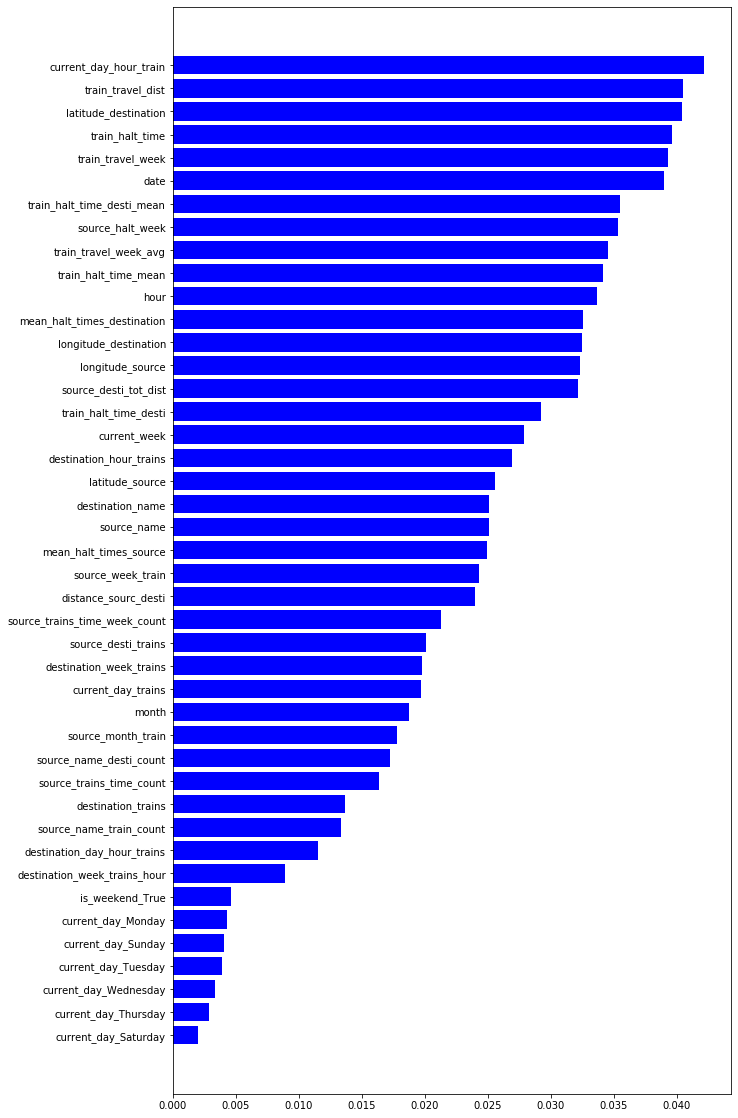

In [255]:
plt.figure(figsize=(10,20))
features=X_train.columns
importances=rf.feature_importances_
indices=np.argsort(importances)
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices]);

In [256]:
df_train.head(1)

,source_name,destination_name,target,longitude_source,latitude_source,mean_halt_times_source,longitude_destination,latitude_destination,mean_halt_times_destination,current_week,month,date,hour,distance_sourc_desti,train_travel_dist,train_travel_week,train_travel_week_avg,train_halt_time,train_halt_time_mean,train_halt_time_desti,train_halt_time_desti_mean,source_name_desti_count,source_name_train_count,source_week_train,source_month_train,source_desti_trains,source_desti_tot_dist,source_trains_time_count,source_trains_time_week_count,source_halt_week,current_day_trains,current_day_hour_train,destination_trains,destination_week_trains,destination_week_trains_hour,destination_hour_trains,destination_day_hour_trains,current_day_Monday,current_day_Saturday,current_day_Sunday,current_day_Thursday,current_day_Tuesday,current_day_Wednesday,is_weekend_True
0,147,1,0,4.36,50.85,634.16,4.34,50.84,271.87,30,7,27,20,2.51,2047.84,50.19,2.51,22163.35,22163.35,6663.77,185.10,92,92,42,37,31,77.79,31,42,13009.57,183,47,32,31,31,31,31,0,0,0,0,0,1,0


In [257]:
from xgboost import XGBClassifier

In [258]:
model=XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [259]:
from xgboost import plot_importance

<Figure size 432x288 with 0 Axes>

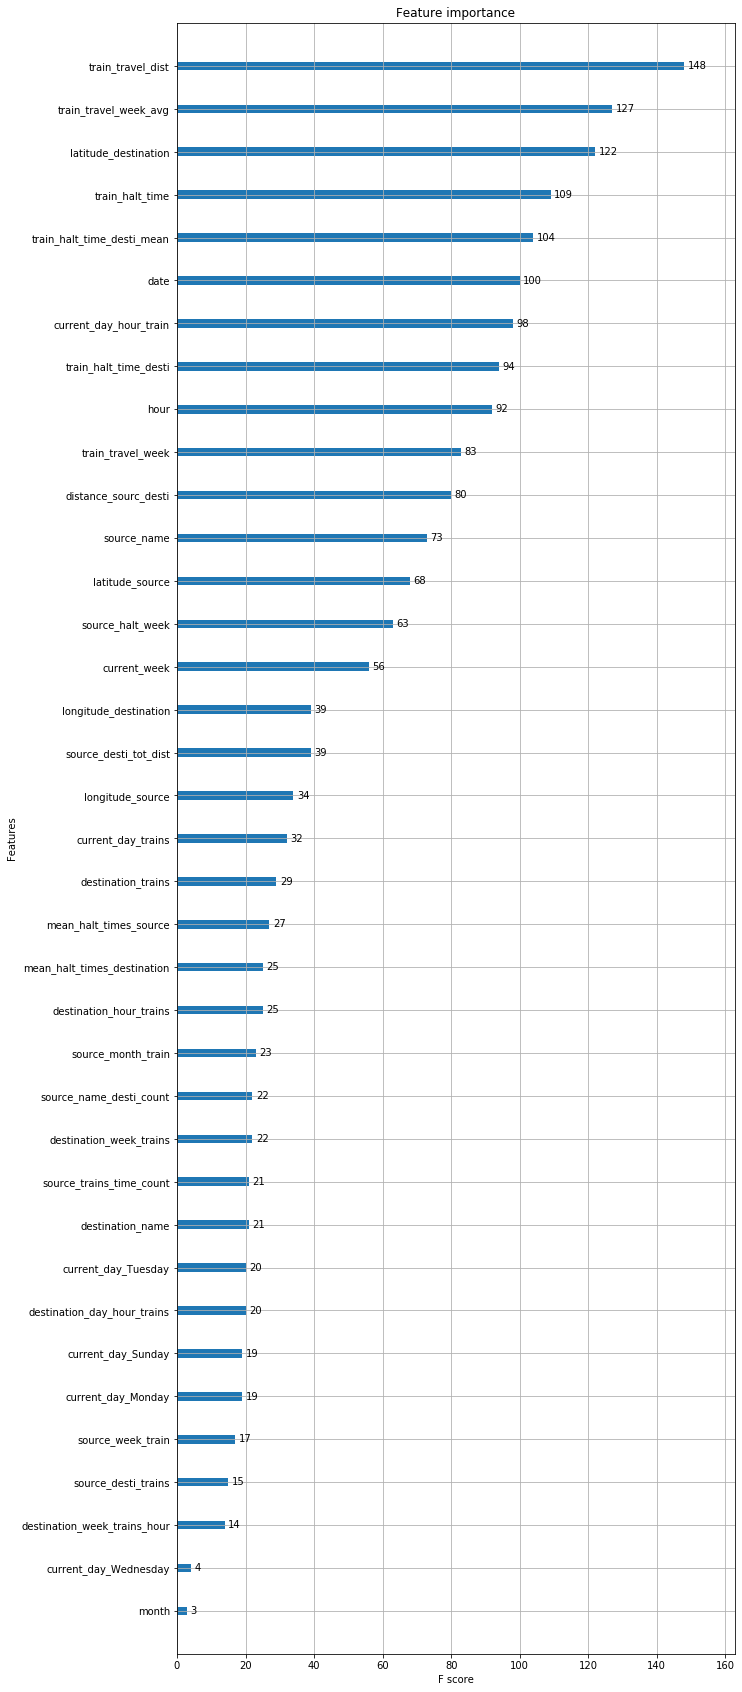

In [260]:
plt.figure()
ax=plot_importance(model)
fig = ax.figure
fig.set_size_inches(10, 30)


In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [262]:
from catboost import CatBoostClassifier,Pool, cv
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

In [263]:
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score,accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV

In [264]:
models=[]
#models.append(('LR',LogisticRegression()))
#models.append(('CART',DecisionTreeClassifier()))
#models.append(('KNN',KNeighborsClassifier()))
#models.append(('NB',GaussianNB()))
models.append(('svc',SVC()))
models.append(('rf',RandomForestClassifier()))
#models.append(('gbm',GradientBoostingClassifier()))
models.append(('xgb',XGBClassifier()))
models.append(('lgbm',lgb.LGBMClassifier()))
#models.append(('cat',CatBoostClassifier()))

In [265]:
model_report=pd.DataFrame(columns=['model','precision','recall','f1','accuracy'])

for clf_name,clf in models:
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    #y_pred_prob=clf.predict_proba(X_test)[:,1]
    
    
    t=pd.Series({'model':clf_name,
                'precision':precision_score(y_test,y_pred,average='macro'),
                'recall':recall_score(y_test,y_pred,average='macro'),
                'f1':f1_score(y_test,y_pred,average='macro'),
                'accuracy':accuracy_score(y_test,y_pred),
                #'roc':roc_auc_score(y_test,y_pred_prob,average='micro')
                })
    model_report=model_report.append(t,ignore_index=True)
    
model_report

,model,precision,recall,f1,accuracy
0,svc,0.66,0.39,0.33,0.48
1,rf,0.53,0.53,0.52,0.55
2,xgb,0.53,0.54,0.53,0.57
3,lgbm,0.60,0.60,0.60,0.62


In [266]:
from sklearn.preprocessing import StandardScaler

In [267]:
sc=StandardScaler()

In [268]:
#X=sc.fit_transform(X)

In [271]:
param_test1={'num_iterations':list(range(200,320,20))}

In [272]:
grid1=GridSearchCV(estimator=lgb.LGBMClassifier(learning_rate=0.1,objective='multi:softmax',num_class=3,subsample=0.8,
                                               num_leaves=20,max_depth=7,min_child_samples=20,
                                              random_state=random_state,subsample_for_bin=1000,colsample_bytree=0.8),param_grid=
                  param_test1,n_jobs=4,iid=False,cv=5,scoring='f1_macro')

In [273]:
grid1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=0.8,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=7,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_class=3, num_leaves=20,
                                      objective='multi:softmax',
                                      random_state=42, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=0.8, subsample_for_bin=1000,
                                      subsample_freq=0),
             iid=False, n_jobs=4,
             param_grid={'num_i

In [277]:
grid1.best_params_,grid1.best_score_

({'num_iterations': 280}, 0.5518528148382724)

In [278]:
param_test2={'max_depth':list(range(4,9,1))}

In [279]:
grid2=GridSearchCV(estimator=lgb.LGBMClassifier(learning_rate=0.1,objective='multi:softmax',num_class=3,subsample=0.8,
                                               num_leaves=20,num_iterations=280,min_child_samples=20,
                                              random_state=random_state,subsample_for_bin=1000,colsample_bytree=0.8),param_grid=
                  param_test2,n_jobs=4,iid=False,cv=5,scoring='f1_macro')

In [280]:
grid2.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=0.8,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_class=3,
                                      num_iterations=280, num_leaves=20,
                                      objective='multi:softmax',
                                      random_state=42, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=0.8, subsample_for_bin=1000,
                                      subsample_freq=0),
      

In [281]:
grid2.best_params_,grid2.best_score_

({'max_depth': 7}, 0.5518528148382724)

In [282]:
param_test3={'num_leaves':list(range(10,22,1))}

In [283]:
grid3=GridSearchCV(estimator=lgb.LGBMClassifier(learning_rate=0.1,objective='multi:softmax',num_class=3,subsample=0.8,
                                               max_depth=7,num_iterations=280,min_child_samples=20,
                                              random_state=random_state,subsample_for_bin=1000,colsample_bytree=0.8),param_grid=
                  param_test3,n_jobs=4,iid=False,cv=5,scoring='f1_macro')

In [284]:
grid3.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=0.8,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=7,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_class=3,
                                      num_iterations=280, num_leaves=31,
                                      objective='multi:softmax',
                                      random_state=42, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=0.8, subsample_for_bin=1000,
                                      subsample_freq=0),
       

In [285]:
grid3.best_params_,grid3.best_score_

({'num_leaves': 20}, 0.5518528148382724)

In [286]:
param_test4={'min_child_samples':list(range(50,150,20))}

In [287]:
grid4=GridSearchCV(estimator=lgb.LGBMClassifier(learning_rate=0.1,objective='multi:softmax',num_class=3,subsample=0.8,
                                               max_depth=7,num_iterations=280,num_leaves=20,
                                              random_state=random_state,subsample_for_bin=1000,colsample_bytree=0.8),param_grid=
                  param_test4,n_jobs=4,iid=False,cv=5,scoring='f1_macro')

In [288]:
grid4.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=0.8,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=7,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_class=3,
                                      num_iterations=280, num_leaves=20,
                                      objective='multi:softmax',
                                      random_state=42, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=0.8, subsample_for_bin=1000,
                                      subsample_freq=0),
       

In [289]:
grid4.best_params_,grid4.best_score_

({'min_child_samples': 70}, 0.544199732438725)

In [290]:
param_test5={'subsample_for_bin':list(range(100,1000,100))}

In [291]:
grid5=GridSearchCV(estimator=lgb.LGBMClassifier(learning_rate=0.1,objective='multi:softmax',num_class=3,subsample=0.8,
                                               max_depth=7,num_iterations=280,num_leaves=20,
                                              random_state=random_state,min_child_samples=70,colsample_bytree=0.8),param_grid=
                  param_test5,n_jobs=4,iid=False,cv=5,scoring='f1_macro')

In [292]:
grid5.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=0.8,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=7,
                                      min_child_samples=70,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_class=3,
                                      num_iterations=280, num_leaves=20,
                                      objective='multi:softmax',
                                      random_state=42, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=0.8, subsample_for_bin=200000,
                                      subsample_freq=0),
     

In [293]:
grid5.best_params_,grid5.best_score_

({'subsample_for_bin': 400}, 0.5545620849204496)

In [294]:
param_test6={'colsample_bytree':[i/10.0 for i in range(6,10)]}

In [295]:
grid6=GridSearchCV(estimator=lgb.LGBMClassifier(learning_rate=0.1,objective='multi:softmax',num_class=3,subsample=0.8,
                                               max_depth=7,num_iterations=280,num_leaves=20,
                                              random_state=random_state,min_child_samples=70,subsample_for_bin=400),param_grid=
                  param_test6,n_jobs=4,iid=False,cv=5,scoring='f1_macro')

In [296]:
grid6.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=7,
                                      min_child_samples=70,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_class=3,
                                      num_iterations=280, num_leaves=20,
                                      objective='multi:softmax',
                                      random_state=42, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=0.8, subsample_for_bin=400,
                                      subsample_freq=0),
        

In [297]:
grid6.best_params_,grid6.best_score_

({'colsample_bytree': 0.8}, 0.5545620849204496)

In [298]:
param_test7 = {'reg_alpha':[0,0.0001,0.0005, 0.001, 0.005, 0.01, 0.05]}

In [299]:
grid7=GridSearchCV(estimator=lgb.LGBMClassifier(learning_rate=0.1,objective='multi:softmax',num_class=3,subsample=0.8,
                                               max_depth=7,num_iterations=280,num_leaves=20,
                                              random_state=random_state,min_child_samples=70,subsample_for_bin=400,colsample_bytree=0.8),param_grid=
                  param_test7,n_jobs=4,iid=False,cv=5,scoring='f1_macro')

In [300]:
grid7.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=0.8,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=7,
                                      min_child_samples=70,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_class=3,
                                      num_iterations=280, num_leaves=20,
                                      objective='multi:softmax',
                                      random_state=42, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=0.8, subsample_for_bin=400,
                                      subsample_freq=0),
        

In [301]:
grid7.best_params_,grid7.best_score_

({'reg_alpha': 0.001}, 0.5562294562525825)

In [302]:
final_lgb=lgb.LGBMClassifier(learning_rate=0.01,objective='multi:softmax',num_class=3,subsample=0.8,
                                               max_depth=7,num_iterations=2800,num_leaves=20,
                                              random_state=random_state,min_child_samples=70,
                             subsample_for_bin=400,colsample_bytree=0.8,reg_alpha=0.001)

In [303]:
final_lgb.fit(X,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
               importance_type='split', learning_rate=0.01, max_depth=7,
               min_child_samples=70, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_class=3, num_iterations=2800,
               num_leaves=20, objective='multi:softmax', random_state=42,
               reg_alpha=0.001, reg_lambda=0.0, silent=True, subsample=0.8,
               subsample_for_bin=400, subsample_freq=0)

In [304]:
df_test=pd.read_csv('final_test.csv')

In [305]:
#df_test=sc.transform(df_test)

In [306]:
df_test.shape

(964, 43)

In [307]:
experi_lgb=final_lgb.predict(df_test)

In [308]:
sub=test[['id_code']]

In [309]:
sub['target']=experi_lgb

In [310]:
sub['target']=le.inverse_transform(sub['target'])
sub.head()

,id_code,target
0,mckbezdplrukagl,low
1,agxwrnbmzbyxsjg,low
2,iqjojyewdyfshtj,low
3,hssqexnzirioaag,low
4,lublknpfraiznhr,medium


In [311]:
sub.to_csv('experi_lgb_wo_sc.csv',index=False)